In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PowerTransformer

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PowerTransformer

df = pd.read_csv(r"C:\Users\aryan\OneDrive\Desktop\Work\archive\spotify_songs.csv")

df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'], errors='coerce')
df = df.dropna(subset=['track_album_release_date'])
df.set_index('track_album_release_date', inplace=True)

df = df.drop_duplicates()

df = df.dropna()

df['duration_min'] = df['duration_ms'] / 60000

numeric_columns = ['track_popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 
                   'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_min']

pt = PowerTransformer(method='yeo-johnson')
df[numeric_columns] = pt.fit_transform(df[numeric_columns])
skewness = df[['track_popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 
               'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 
               'tempo', 'duration_ms']].skew()

df_cleaned = df.drop(columns=['track_id', 'track_album_id', 'playlist_name', 'playlist_id', 'playlist_genre'])

categorical_columns = ['track_name', 'track_artist', 'track_album_name', 'playlist_subgenre']
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_columns, drop_first=True)

df_encoded.head()

skewness

track_popularity   -0.481222
danceability       -0.043595
energy             -0.099639
key                -0.248088
loudness           -0.003601
mode               -0.245655
speechiness         0.501093
acousticness        0.401657
instrumentalness    1.731268
liveness            0.306455
valence            -0.037829
tempo               0.020758
duration_ms         1.169463
dtype: float64

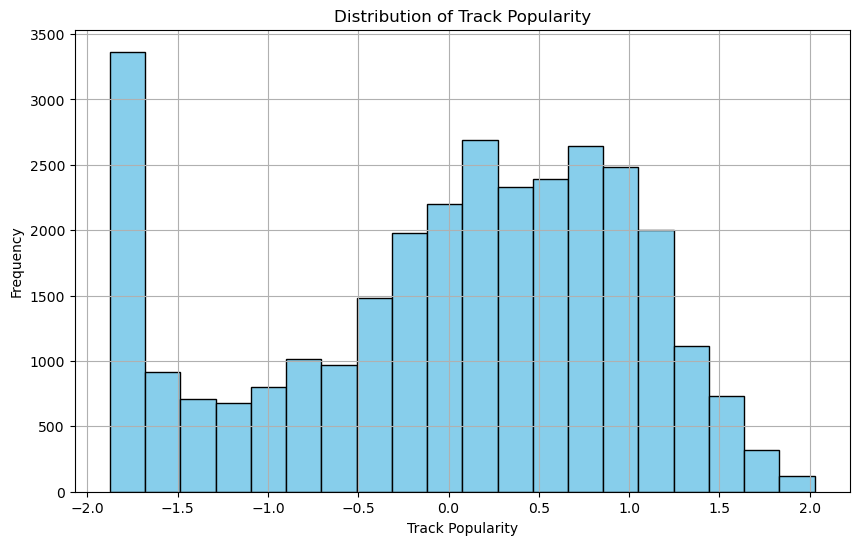

In [3]:
# 1. Distribution of Track Popularity
plt.figure(figsize=(10, 6))
plt.hist(df['track_popularity'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Track Popularity')
plt.xlabel('Track Popularity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

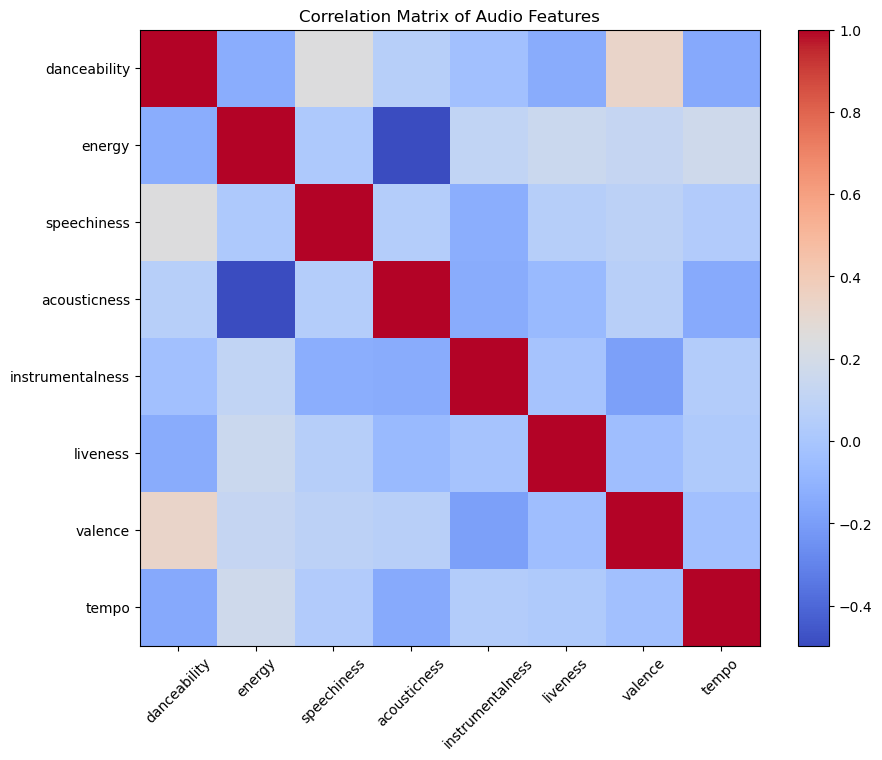

In [4]:
# 2. Correlation Matrix of Audio Features
audio_features = df[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
correlation_matrix = audio_features.corr()

plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix of Audio Features')
plt.show()

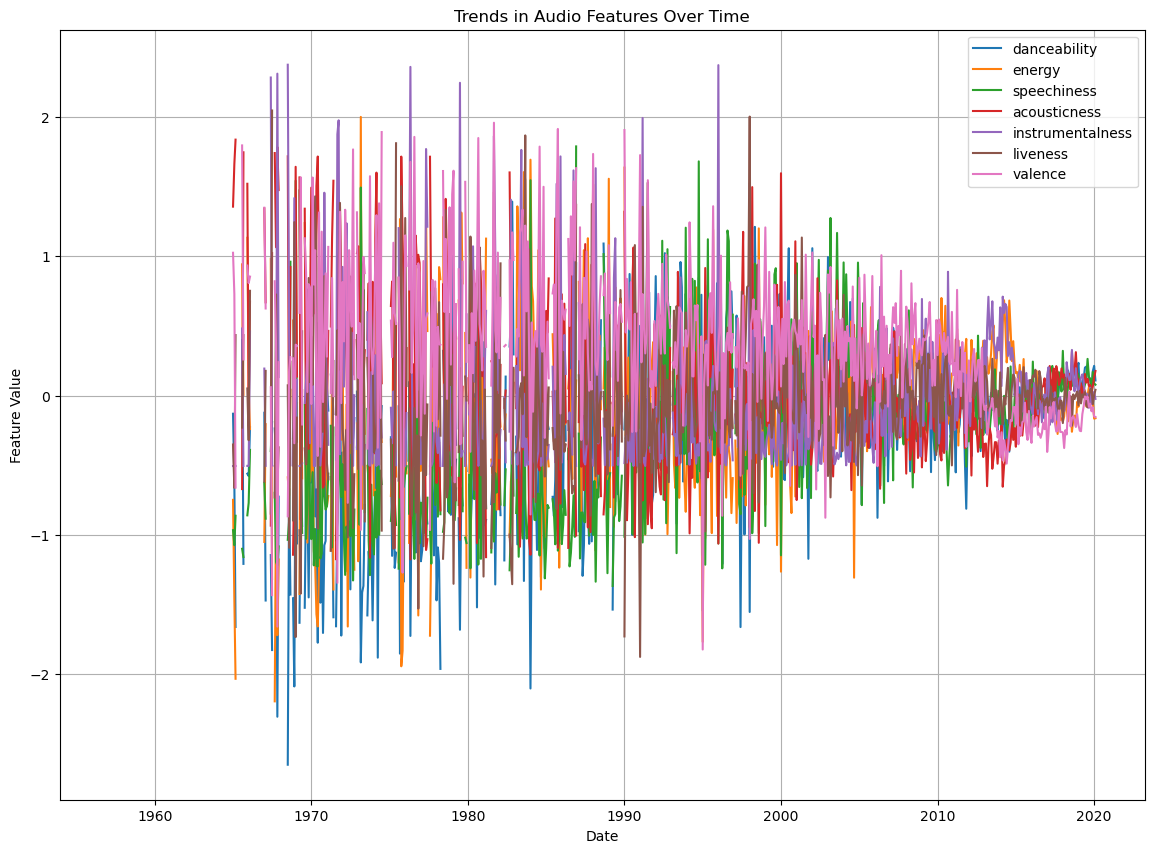

In [5]:
# 3. Trends in Audio Features Over Time
monthly_features = df[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']].resample('M').mean()

plt.figure(figsize=(14, 10))
for feature in monthly_features.columns:
    plt.plot(monthly_features.index, monthly_features[feature], label=feature)
plt.title('Trends in Audio Features Over Time')
plt.xlabel('Date')
plt.ylabel('Feature Value')
plt.legend()
plt.grid(True)
plt.show()

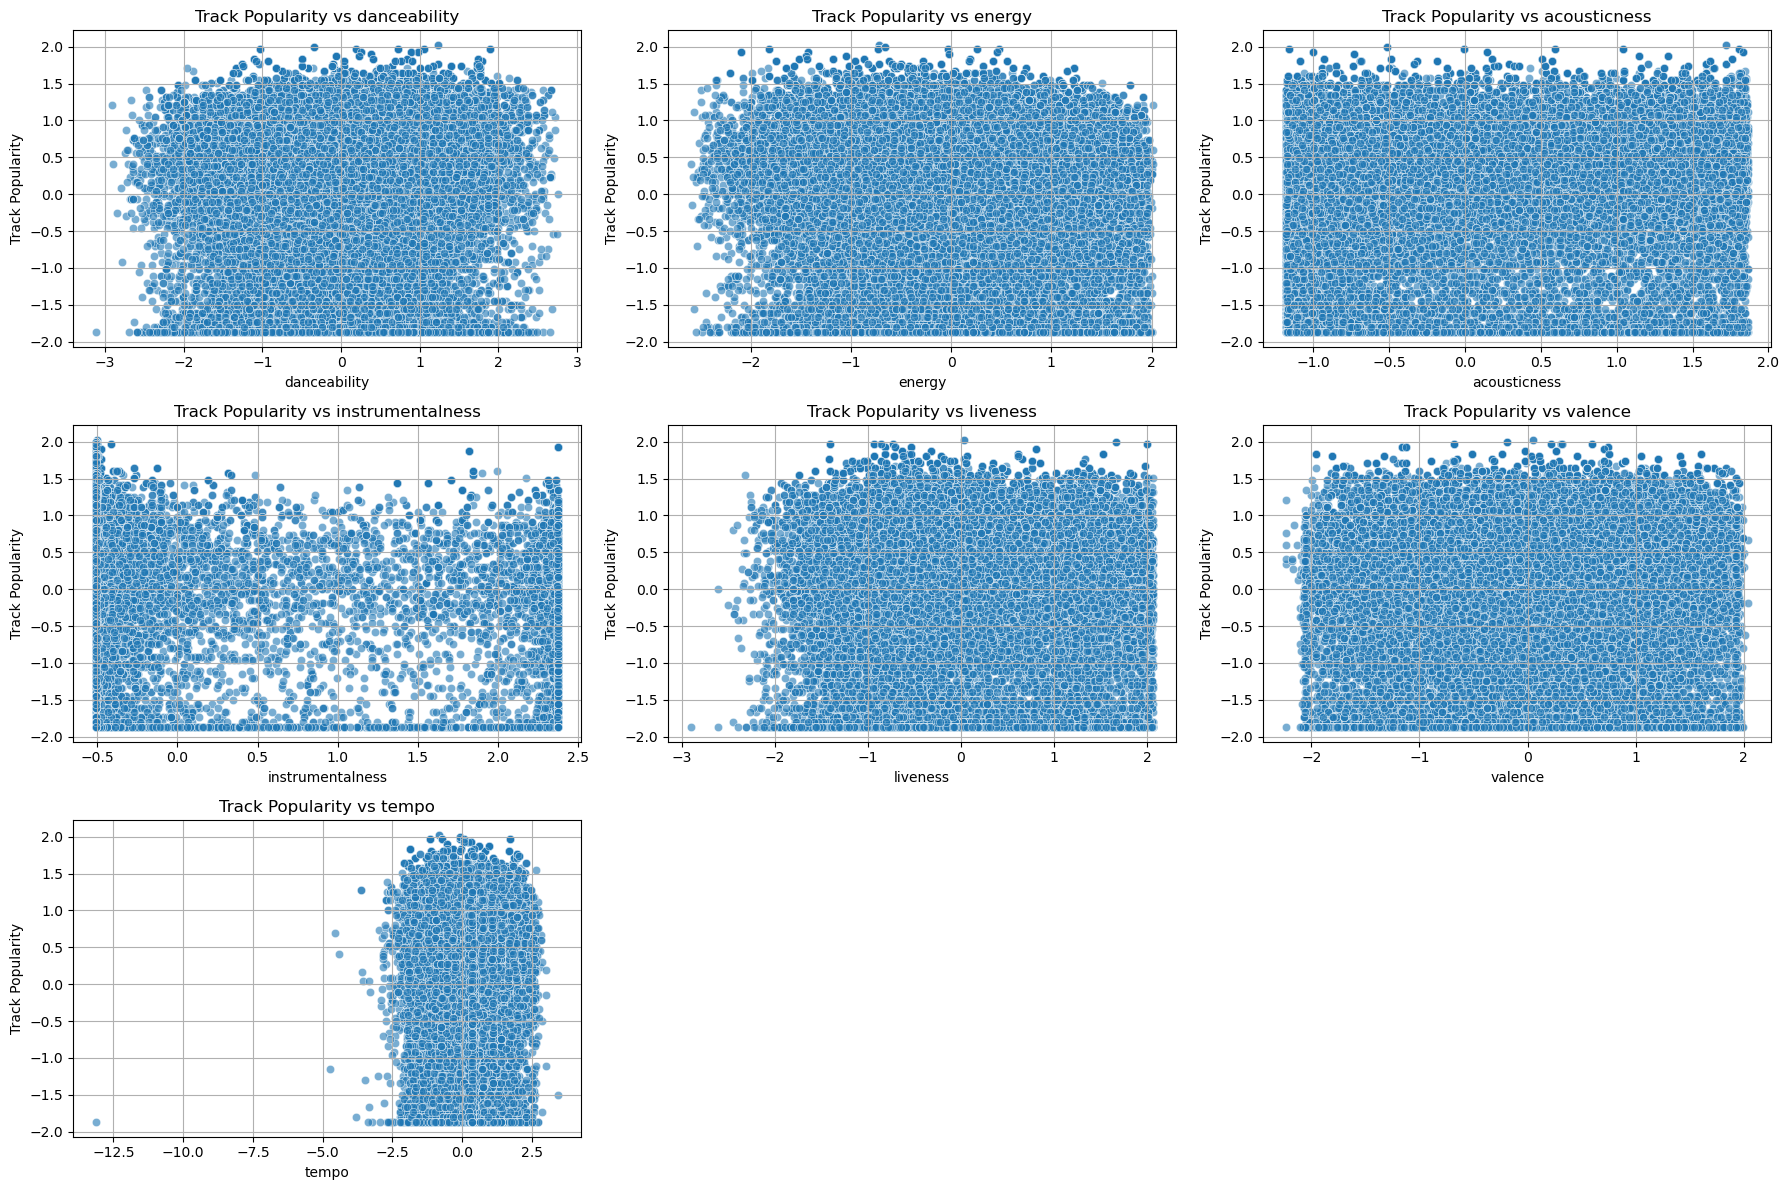

In [6]:
# 4. Scatter Plots of Popularity vs Key Audio Features
key_variables = ['danceability', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

plt.figure(figsize=(18, 12))
for i, variable in enumerate(key_variables, 1):
    plt.subplot(3, 3, i)
    plt.scatter(df[variable], df['track_popularity'], alpha=0.6, edgecolors='w', linewidth=0.5)
    plt.title(f'Track Popularity vs {variable}')
    plt.xlabel(variable)
    plt.ylabel('Track Popularity')
    plt.grid(True)
plt.tight_layout()
plt.show()

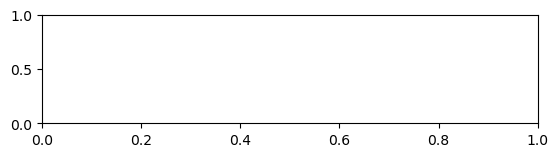

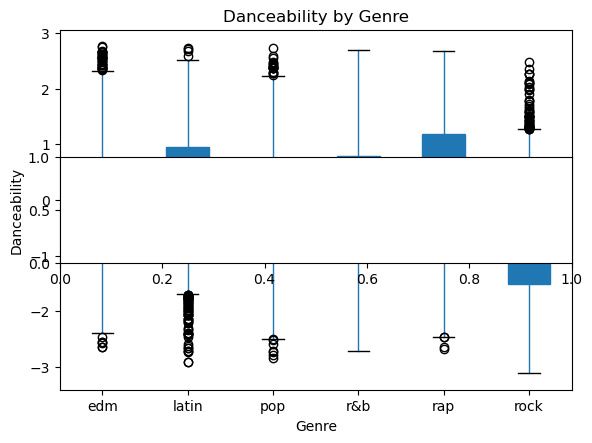

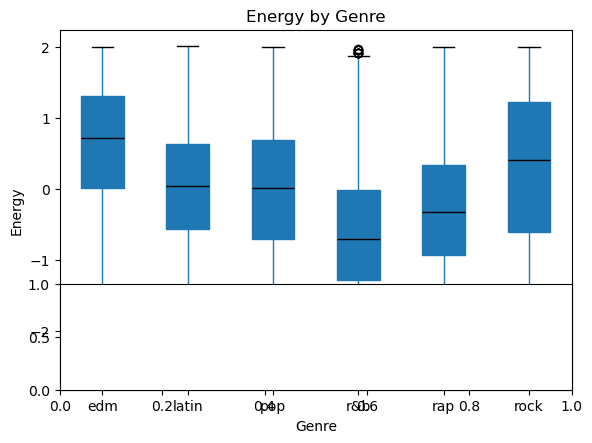

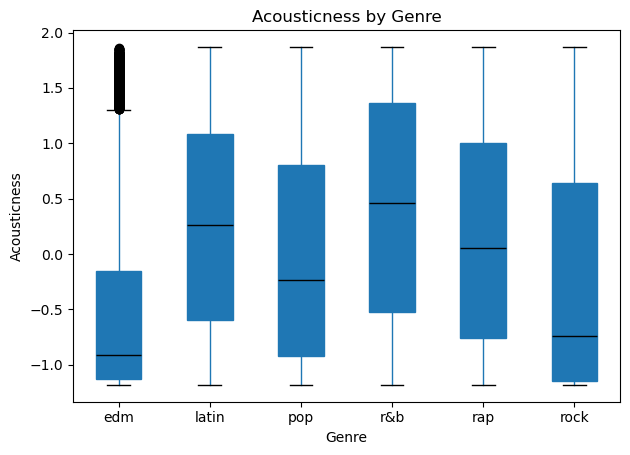

In [7]:
#5. Danceability by genre
plt.subplot(3, 1, 1)
df.boxplot(column='danceability', by='playlist_genre', grid=False, patch_artist=True, medianprops=dict(color='black'))
plt.title('Danceability by Genre')
plt.suptitle('')
plt.xlabel('Genre')
plt.ylabel('Danceability')

# Energy by genre
plt.subplot(3, 1, 2)
df.boxplot(column='energy', by='playlist_genre', grid=False, patch_artist=True, medianprops=dict(color='black'))
plt.title('Energy by Genre')
plt.suptitle('')
plt.xlabel('Genre')
plt.ylabel('Energy')

# Acousticness by genre
plt.subplot(3, 1, 3)
df.boxplot(column='acousticness', by='playlist_genre', grid=False, patch_artist=True, medianprops=dict(color='black'))
plt.title('Acousticness by Genre')
plt.suptitle('')
plt.xlabel('Genre')
plt.ylabel('Acousticness')

plt.tight_layout()
plt.show()


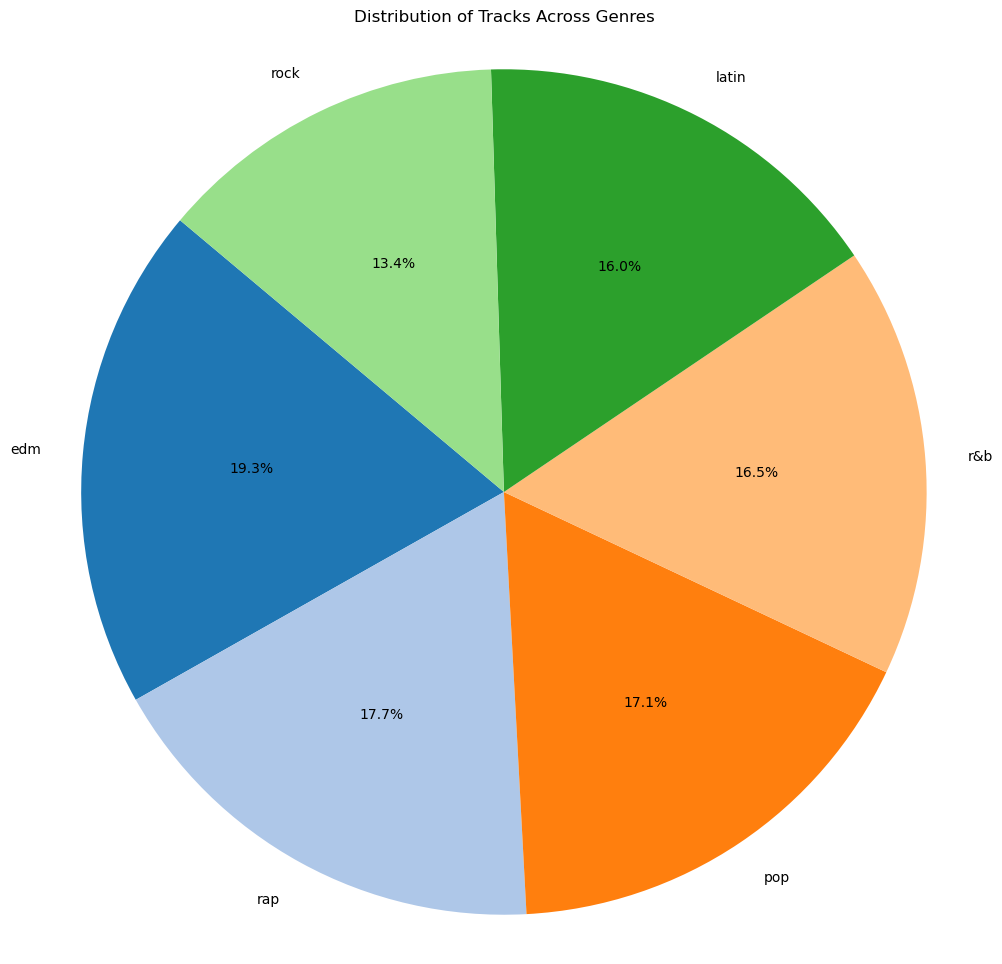

In [8]:
# 6. Genre Distribution
genre_distribution = df['playlist_genre'].value_counts()

plt.figure(figsize=(12, 12))
plt.pie(genre_distribution, labels=genre_distribution.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Distribution of Tracks Across Genres')
plt.axis('equal')
plt.show()

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error


numeric_columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
X = df[numeric_columns]
y = df['track_popularity']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(alpha=0.1),
    'Ridge Regression': Ridge(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    val_predictions = model.predict(X_val)
    mse = mean_squared_error(y_val, val_predictions)
    print(f"{name} Validation MSE: {mse}")

Linear Regression Validation MSE: 0.9434508319637515
Lasso Regression Validation MSE: 0.9727680461537886
Ridge Regression Validation MSE: 0.9434503681112157
Random Forest Validation MSE: 0.7465237111775279
Gradient Boosting Validation MSE: 0.9099669872280827


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=2)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best parameters from Grid Search:", best_params)

best_rf = RandomForestRegressor(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

test_predictions = best_rf.predict(X_test)
test_mse = mean_squared_error(y_test, test_predictions)
print("Test MSE of the best Random Forest model:", test_mse)

importances = best_rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': numeric_columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
